# Performing principle component analysis

Let's now have a closer look at PCA. First, import some packages:

In [1]:
##### added line to ensure plots are showing
%matplotlib inline
#####

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from pandas.plotting import scatter_matrix
import matplotlib.cm as cm
from random import randint

## The dataset

Then, load the breast cancer dataset and normalize it for use with PCA:

In [2]:
data = datasets.load_breast_cancer()

X = data.data
y = data.target

X = normalize(X)

## Applying PCA

Apply PCA:

In [3]:
pca = PCA()
pca.fit(X)

# The new variable contains the transformed data, i.e., it will have as many columns as PCs generated.
# All observations are reconstructed by weighing the values for their variables according to the correlation of that
# variable with the PC
X_2 = pca.transform(X)

## Visualisation

Create the scree plot:

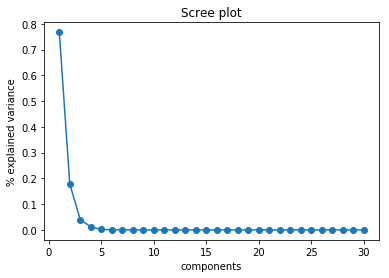

In [4]:
plt.plot(range(1,len(pca.components_)+1),pca.explained_variance_ratio_,'-o')
plt.xlabel('components')
plt.ylabel('% explained variance')
plt.title("Scree plot")
plt.show()

Let's do PCA with a limited number of components:

In [5]:
pca = PCA(n_components=3)
pca.fit(X)
X_2 = pca.transform(X)

Then plot the PCs against each other:

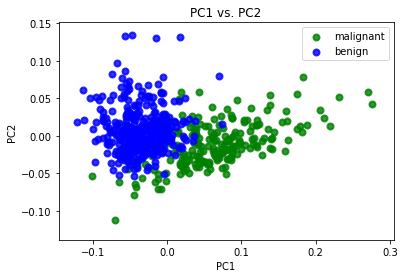

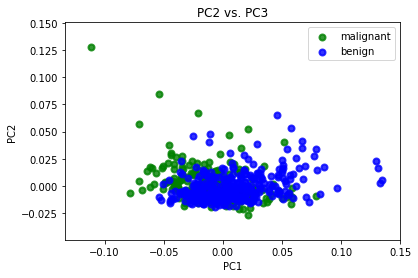

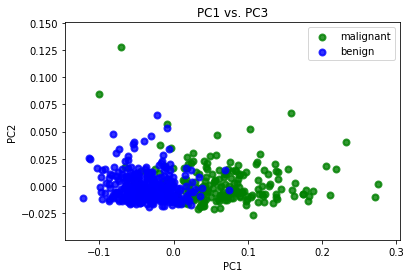

In [6]:
# Some variables for plotting:
colors = ['green','blue','red']
lw = 2

# Plot 1
for color, i, target_name in zip(colors, [0, 1, 2],data.target_names):
    plt.scatter(X_2[y == i, 0], X_2[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PC1 vs. PC2')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Plot 2
for color, i, target_name in zip(colors, [0, 1, 2],data.target_names):
    plt.scatter(X_2[y == i, 1], X_2[y == i, 2], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PC2 vs. PC3')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Plot 3
for color, i, target_name in zip(colors, [0, 1, 2],data.target_names):
    plt.scatter(X_2[y == i, 0], X_2[y == i, 2], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PC1 vs. PC3')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## Plotting component weights

Finally, plot the variables' component weights:

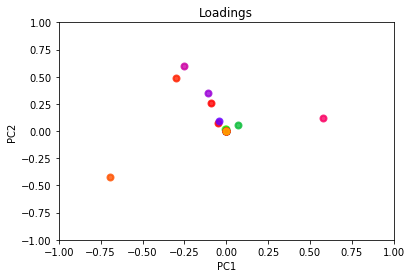

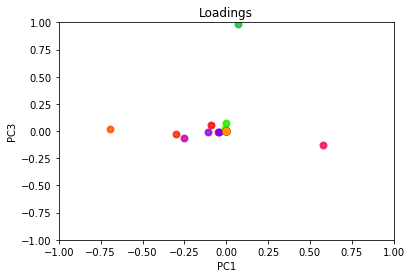

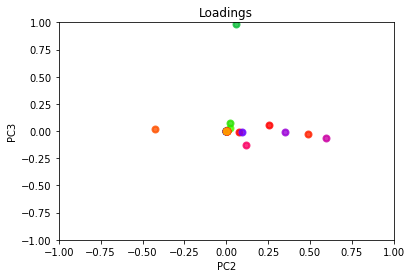

In [7]:
# Notice how I use a color map to make sure the variables are colored differently, but consequently over the 3 graphs

for i in range(0,len(pca.components_[0])):
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.scatter(pca.components_[0, i], pca.components_[1, i],color=cm.prism(i), alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()    

for i in range(0,len(pca.components_[0])):
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.scatter(pca.components_[0, i], pca.components_[2, i],color=cm.prism(i), alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.show()

for i in range(0,len(pca.components_[0])):
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.scatter(pca.components_[1, i], pca.components_[2, i],color=cm.prism(i), alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.show()

## Plotting loadings (new)

Finally, plot the variables' loadings (component weights scaled according to the variance explained by the PC):

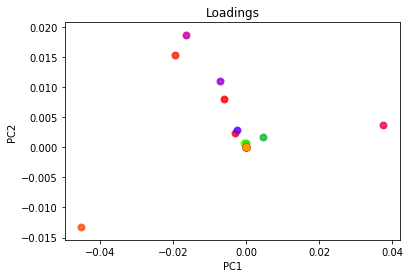

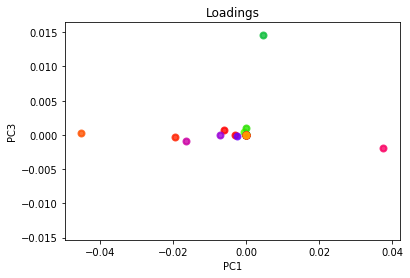

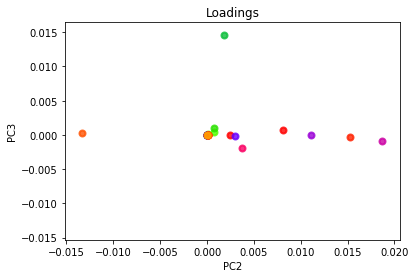

In [8]:
# Notice how I use a color map to make sure the variables are colored differently, but consequently over the 3 graphs

for i in range(0,len(pca.components_[0])):
#     plt.xlim(-1,1)
#     plt.ylim(-1,1)
    pca_0_loadings = pca.components_[0, i] * np.sqrt(pca.explained_variance_[0])
    pca_1_loadings = pca.components_[1, i] * np.sqrt(pca.explained_variance_[1])
    plt.scatter(pca_0_loadings, pca_1_loadings,color=cm.prism(i), alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()    

for i in range(0,len(pca.components_[0])):
#     plt.xlim(-1,1)
#     plt.ylim(-1,1)
    pca_0_loadings = pca.components_[0, i] * np.sqrt(pca.explained_variance_[0])
    pca_2_loadings = pca.components_[2, i] * np.sqrt(pca.explained_variance_[2])
    plt.scatter(pca_0_loadings, pca_2_loadings,color=cm.prism(i), alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.show()

for i in range(0,len(pca.components_[0])):
#     plt.xlim(-1,1)
#     plt.ylim(-1,1)
    pca_1_loadings = pca.components_[1, i] * np.sqrt(pca.explained_variance_[1])
    pca_2_loadings = pca.components_[2, i] * np.sqrt(pca.explained_variance_[2])
    plt.scatter(pca_1_loadings, pca_2_loadings,color=cm.prism(i), alpha=.8, lw=lw,
                )
plt.title('Loadings')
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.show()